# Welcome to stock analysis project! 

# In this portfolio project I have done an analysis on stocks from five different companies in healthcare industry over the stock data for one year time period.  I have used pandas to get stock information from yahoo Finance, visualize different aspects of it, and finally I have analyzed the risk of a stock, based on its previous performance history. I have also used Monte Carlo method to predict future stock price.

In the projects the following questions will be answerd through analysis and visualization.

1.) What was the change in price of the stock over time?

2.) What was the daily return of the stock on average?

3.) What was the correlation between different stocks' closing prices?

4.) What was the correlation between different stocks' daily returns?

5.) How much value do we put at risk by investing in a particular stock?

6.) How can we attempt to predict future stock behavior?

In [ ]:
#Importing Libraries for the Analysis

import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


# For time stamps
from datetime import datetime

# For division
from __future__ import division

In [48]:
# For reading data for Yahoo Finance

import pandas_datareader as dr

Creating dataframe for each companies in Health Care industry with the data taken from Yahoo finance within the period 
 '2021-07-10'-'2022-07-10'
 Healthcare Industry companies:
    United Health Group Incorporated(UNH),
    Eli & Lily (LLY), 
    Johnson & Johnson (J&J), 
    Pfizer(PFE),
    Novo Nordisk(NVO)

In [49]:

UNH=dr.get_data_yahoo('UNH',start='2021-01-01',end='2022-01-31')
LLY=dr.get_data_yahoo('LLY',start='2021-01-01',end='2022-01-31')
JNJ=dr.get_data_yahoo('JNJ',start='2021-01-01',end='2022-01-31')
PFE=dr.get_data_yahoo('PFE',start='2021-01-01',end='2022-01-31')
NVO=dr.get_data_yahoo('NVO',start='2021-01-01',end='2022-01-31')

In [51]:
# Different way : Getting data for all companies at with For Loops
health_list=['UNH','LLY','JNJ','PFE','NVO']
for stock in health_list:
    globals()[stock]=dr.get_data_yahoo(stock,start='2021-07-10',end='2022-07-10')

In [93]:
PFE.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-07-12,40.250000,39.599998,39.660000,39.759998,24513000.0,38.451942
2021-07-13,39.799999,39.529999,39.770000,39.650002,12222000.0,38.345566
2021-07-14,40.029999,39.660000,39.720001,39.950001,15888600.0,38.635693
2021-07-15,40.189999,39.860001,39.950001,40.090000,20250800.0,38.771088
2021-07-16,40.349998,39.930000,40.139999,40.349998,24270400.0,39.022530


In [52]:
#summary stats
UNH.describe()

,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,469.266694,459.537051,464.126215,464.661076,3.076912e+06,461.428654
std,39.791978,38.122297,38.861917,39.129624,1.261639e+06,40.336667
min,393.690002,383.119995,389.339996,387.010010,1.284200e+06,383.246948
25%,425.169998,419.580002,422.049988,423.134995,2.409400e+06,417.555069
50%,473.179993,462.000000,467.190002,468.410004,2.977400e+06,465.368378
75%,499.970001,488.504990,494.005005,495.050003,3.535400e+06,492.562622
max,553.289978,539.000000,545.500000,546.010010,1.586110e+07,544.069763


In stock we see two columns, closing price and adjusted closing price. The closing price refers to the price the stock was traded at last whereas Adjusted closing price is the closing price adjusted for corporate actions such as dividend payouts, stock splits, or the issuance of more shares.

<AxesSubplot:xlabel='Date'>

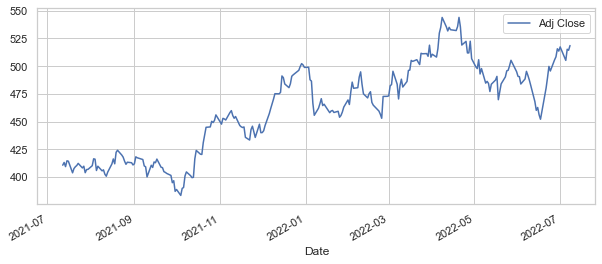

In [53]:
#Having a look thorugh plot of the Adj closing price of United Health Group
UNH['Adj Close'].plot(legend=True,figsize=(10,4))

Text(0.5, 1.0, 'Stocks Volume traded over the period')

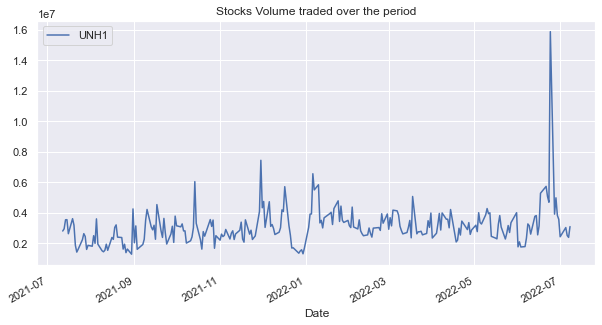

In [118]:
#Volume of stocks traded over the 1 year period

UNH['Volume'].plot(legend=True,figsize=(10,5))
plt.legend(['UNH1'])
plt.title('Stocks Volume traded over the period')
# visibly in July 2022 there is a huge peak in the stock volume being traded for UNH

Daily Return analysis: To do the analysis we will use the percentage change in Adj closing price in each day.

In [55]:

# We'll use pct_change to find the percent change of stock for each day

UNH['Daily Return'] = UNH['Adj Close'].pct_change()


<AxesSubplot:xlabel='Date'>

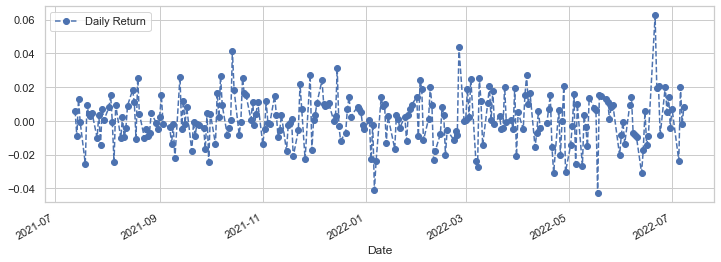

In [56]:
# Then we'll plot the daily return percentage

UNH['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

C:\Users\T470\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

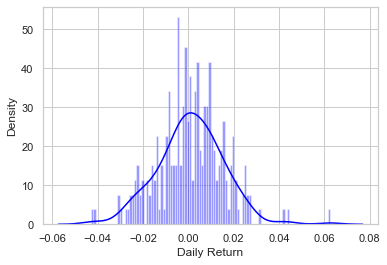

In [57]:
# We use the dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(UNH['Daily Return'].dropna(),bins=100,color='blue')

# Could have also done:
#AAPL['Daily Return'].hist()

<AxesSubplot:>

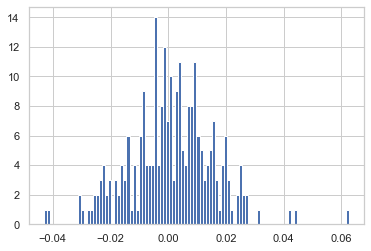

In [58]:
UNH['Daily Return'].hist(bins=100)

In [59]:
#Grab all the closing prices for the tech stock list into one DataFrame
closing_df=dr.get_data_yahoo(health_list,start='2021-07-10',end='2022-07-10')['Adj Close']

In [60]:
closing_df.head()

Symbols,UNH,LLY,JNJ,PFE,NVO
Date,,,,,
2021-07-12,410.553650,232.729965,165.252960,38.451939,85.311806
2021-07-13,413.020660,232.029861,165.048203,38.345562,85.370918
2021-07-14,409.270752,233.065247,166.169510,38.635696,85.646751
2021-07-15,414.510742,228.253067,164.170654,38.771084,86.306786
2021-07-16,414.165375,229.229324,163.907379,39.022530,87.341164


In [61]:
#make a new health_returns dataframe with percentage chagnge data
health_returns=closing_df.pct_change()


In [62]:
health_returns.head()

Symbols,UNH,LLY,JNJ,PFE,NVO
Date,,,,,
2021-07-12,NaN,NaN,NaN,NaN,NaN
2021-07-13,0.006009,-0.003008,-0.001239,-0.002766,0.000693
2021-07-14,-0.009079,0.004462,0.006794,0.007566,0.003231
2021-07-15,0.012803,-0.020647,-0.012029,0.003504,0.007706
2021-07-16,-0.000833,0.004277,-0.001604,0.006485,0.011985


C:\Users\T470\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


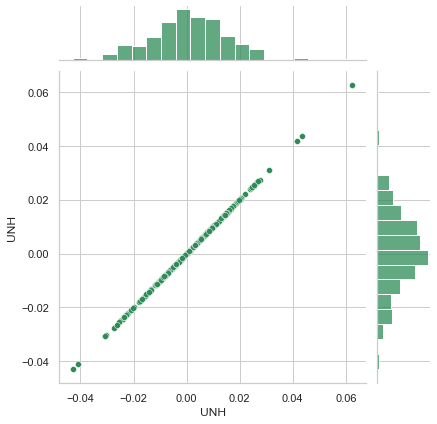

In [63]:
# Comparing UnitedHealth Group Incorporated to itself should show a perfectly linear relationship
sns.jointplot('UNH','UNH',health_returns,kind='scatter',color='seagreen')

C:\Users\T470\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


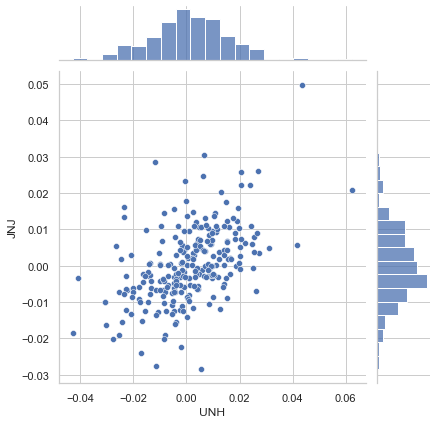

In [64]:
# We'll use joinplot to compare the daily returns of United Health group and Johnson & Johnson
j=sns.jointplot('UNH','JNJ',health_returns,kind='scatter')


In [65]:
import scipy.stats as stats
sns.set(font_scale=1.5)

In [66]:
health_returns[['UNH','JNJ']].corr(method='pearson')


Symbols,UNH,JNJ
Symbols,,
UNH,1.000000,0.500323
JNJ,0.500323,1.000000


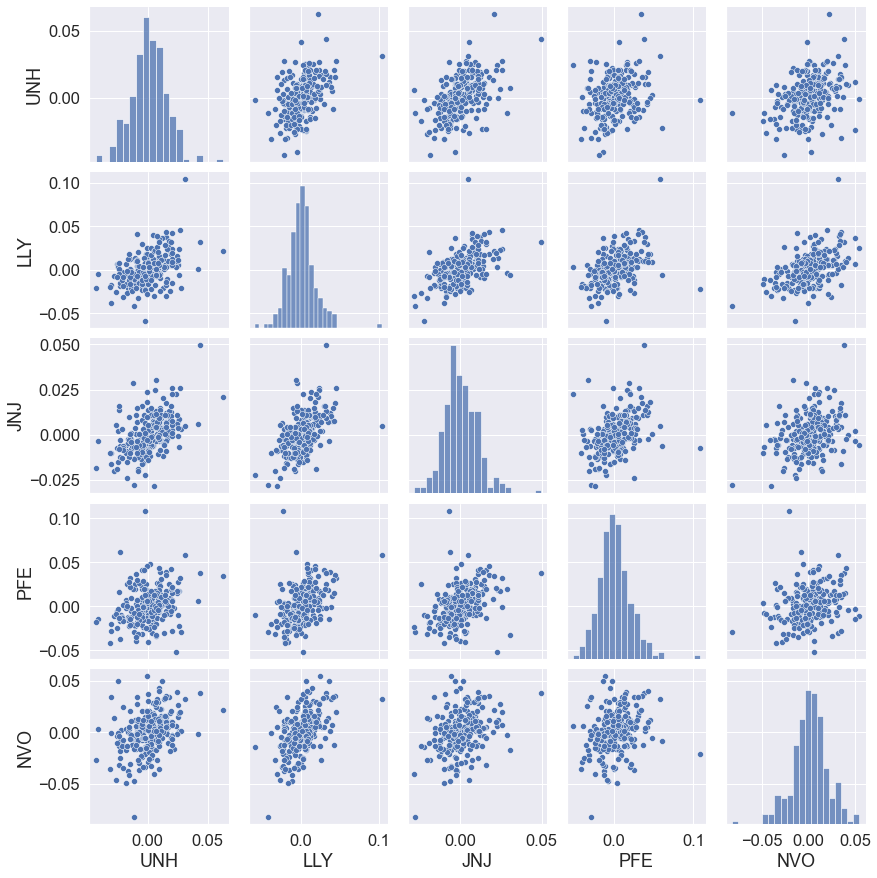

In [67]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.set(font_scale=1.5)
sns.pairplot(health_returns.dropna())

In [68]:
health_returns[['LLY','NVO']].corr(method='pearson')

Symbols,LLY,NVO
Symbols,,
LLY,1.000000,0.485204
NVO,0.485204,1.000000


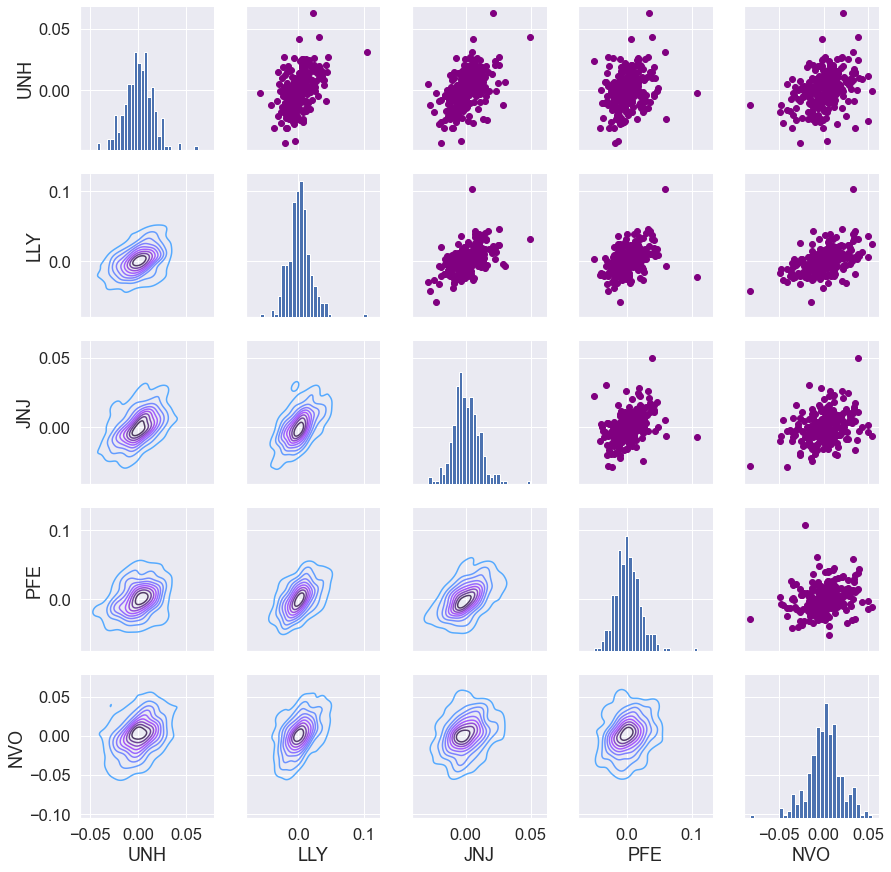

In [69]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(health_returns.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

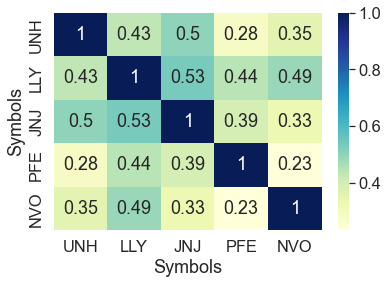

In [70]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
#sns.corrplot(health_returns.dropna(),annot=True)

sns.heatmap(health_returns.corr(), cmap="YlGnBu", annot=True)

Just as from the PairPlot we see here numerically and visually that Johnson & Johnson and Eli lily & Company  had the strongest correlation 
of daily stock return. It's also interesting to see that all the companies from the industry are positively correlated with JNJ and LLY being the highest correlation and Novo nordisk and Pfizer lowest pearson correlation value.
Now that we've done some daily return analysis, let's go ahead and start looking deeper into actual risk analysis.

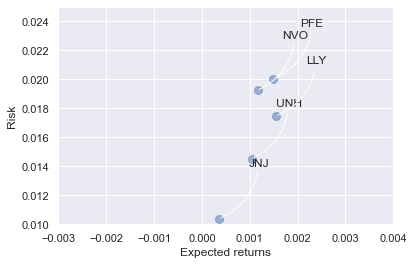

In [120]:
sns.set_style('whitegrid')
sns.set(font_scale=1)
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = health_returns.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot.
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

#From the risk aalysis we prefer to invest in stocks that has higher expected returns and less Risk. From the analysis, Johnson & Johnson seems
#to have a very low risk but with lowest expecte returns among all the other companies. Eli Lily seems to have the highest expected
#returns among all the companies. United health group altghou had a little less return but poses lower risk than Eli Lily. Novo nordisk and pfizer both has higher returns but with high risk. Ideal investment would be to invest in United health group.

Value at Risk: 
Let's define a value at risk parameter for our stocks. We can treat value at risk as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval. Here Value at risk is analyzed using the "bootstrap" method.For this method we will calculate the empirical quantiles from a histogram of daily returns


C:\Users\T470\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

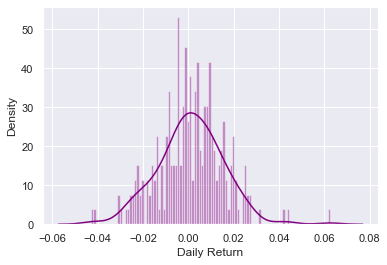

In [76]:
# Lets pick United health group stocks to get Daily Returns histogram.
# We use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(UNH['Daily Return'].dropna(),bins=100,color='purple')

In [77]:
# To ger the risk value of stock we use quantile.
# The 0.05 empirical quantile of daily returns
rets['UNH'].quantile(0.05)

-0.023516431110474197

The 0.05 empirical quantile of daily returns is at -0.023. That means that with 95% confidence, our worst daily loss will not exceed 2.3%. 
If we have a $10000 dollar investment, our one-day 5% VaR is (0.023 * 10000= $230. so we with 95% confidence we can say we only going to lose 
$230 out of $10000 investment.

In [79]:
rets['LLY'].quantile(0.05)

-0.023589604810083202

In [81]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for AAPL
mu = rets.mean()['UNH']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['UNH']

In [83]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [87]:
UNH1=np.round(UNH.loc[:,:],decimals=2)
UNH

,High,Low,Open,Close,Volume,Adj Close,Daily Return
Date,,,,,,,
2021-07-12,416.399994,410.309998,411.019989,416.040009,2802600.0,410.553650,NaN
2021-07-13,419.690002,415.709991,416.380005,418.540009,2948900.0,413.020660,0.006009
2021-07-14,422.529999,413.350006,420.769989,414.739990,3538700.0,409.270752,-0.009079
2021-07-15,421.730011,407.200012,411.910004,420.049988,3546500.0,414.510742,0.012803
2021-07-16,422.290009,417.640015,421.359985,419.700012,2625400.0,414.165375,-0.000833
...,...,...,...,...,...,...,...
2022-07-01,517.530029,502.309998,512.320007,517.400024,2426000.0,517.400024,0.007340
2022-07-05,511.000000,492.250000,507.640015,505.239990,3029600.0,505.239990,-0.023502
2022-07-06,517.409973,504.299988,505.640015,515.289978,2506700.0,515.289978,0.019892


Text(0.5, 1.0, 'Monte Carlo Analysis for United Health Group')

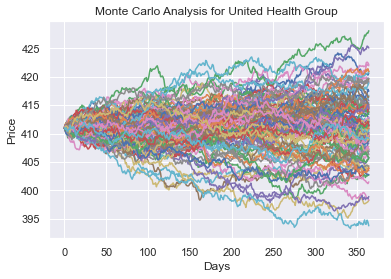

In [91]:
# Get start price from UNH.head()
start_price = 411.02

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for United Health Group')

In [89]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

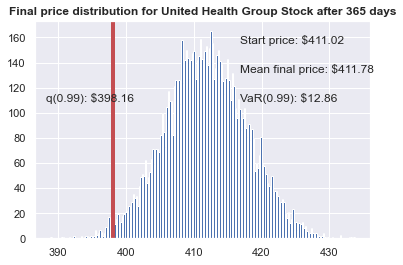

In [92]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for UnitedHealth Group Stock after %s days" % days, weight='bold');

Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the UnitedHealth Group, 
which looks to be $12.86 for every investment of $411.02 (the price of one inital United Heath Group stock).The value at risk is $398.16

This basically means for every initial stock you purchase your putting about $12.86 at risk 99% of the time from our Monte Carlo Simulation.